# 1/ Prise en main rapide (non évaluée) 

# Introduction

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

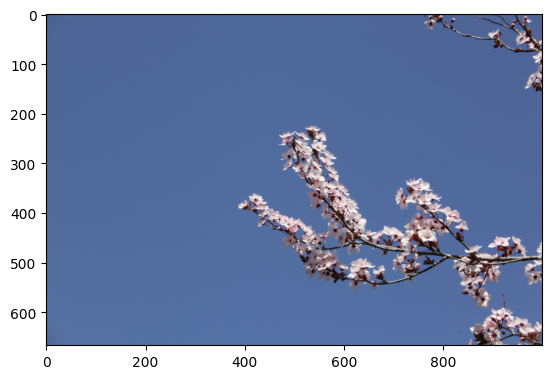

In [2]:
#Ouvrir une image
img = cv.imread("imagesTP/CerisierP.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

#Afficher une image
plt.figure()
plt.imshow(img)

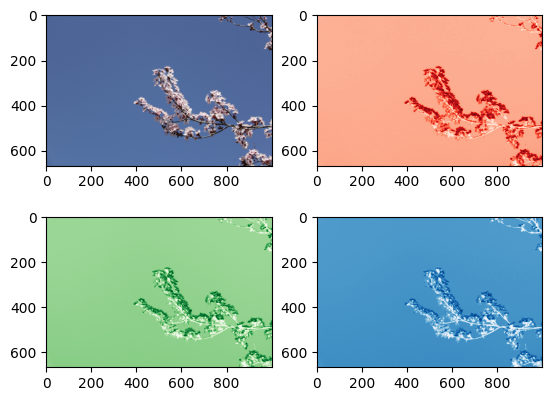

In [3]:
#Afficher les canaux
rouge = img[:,:, 0]
vert = img[:,:, 1]
bleu = img[:,:, 2]
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.subplot(2, 2, 2)
plt.imshow(rouge, cmap="Reds")
plt.subplot(2, 2, 3)
plt.imshow(vert, cmap="Greens")
plt.subplot(2, 2, 4)
plt.imshow(bleu, cmap="Blues")

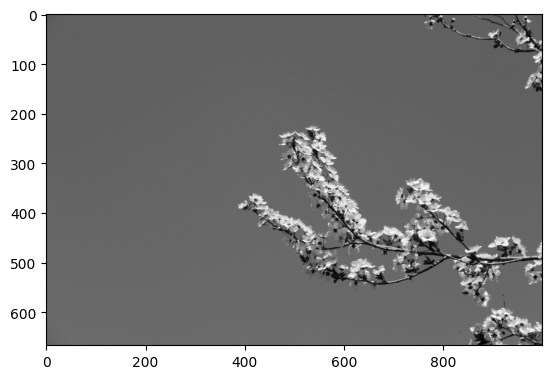

In [4]:
# Transformation en niveau de gris
imgG = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(imgG, cmap="gray")

plt.show()

In [61]:
def histogramme(img):
    # Initialiser un tableau pour stocker les comptes des intensités de pixels
    histogramme = np.zeros(256, dtype=int)
    
    # Obtenir les dimensions de l'image
    height, width = img.shape
    
    # Parcourir chaque pixel de l'image
    for y in range(height):
        for x in range(width):
            # Obtenir la valeur de l'intensité du pixel
            pixel_value = img[y, x]
            # Incrémenter le compteur correspondant dans l'histogramme
            histogramme[pixel_value] += 1
    
    
    
    return histogramme
    

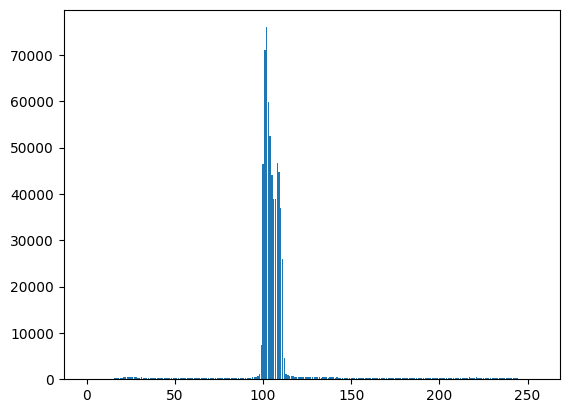

In [62]:
hist=histogramme(imgG)
plt.bar(range(256), hist)
plt.show()

In [63]:
def binarisation(img, seuil):
    # Initialiser une image binaire de la même taille que l'image en niveaux de gris
    image_binaire = np.zeros_like(img)
    
    # Appliquer le seuil pour chaque pixel
    height, width = img.shape
    for y in range(height):
        for x in range(width):
            if img[y, x] > seuil:
                image_binaire[y, x] = 255  # Pixel blanc
            else:
                image_binaire[y, x] = 0  # Pixel noir
    
    return image_binaire
    

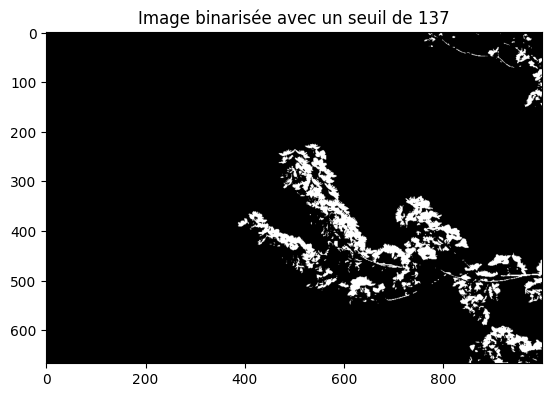

In [64]:
image_binarisée=binarisation(imgG, 137)
plt.figure()
plt.imshow(image_binarisée, cmap="gray")
plt.title('Image binarisée avec un seuil de 137')
plt.show()

In [65]:
def binarisation_automatique(img):
    # Calculer l'histogramme de l'image
    hist = histogramme(img)

    total_pixels = np.sum(hist)  # Nombre total de pixels dans l'image
    
    # Calcul des moments statistiques
    def calculer_moment(hist, n):
        total_pixels = np.sum(hist)
        somme_poids = 0
        for i in range(256):
            poids = i**n * np.int64(hist[i]) / total_pixels
            somme_poids += poids
        return somme_poids

    m0 = calculer_moment(hist, 0)
    print("m0",m0)

    

    m1 = calculer_moment(hist, 1)
    print("m1",m1)

    m2 = calculer_moment(hist, 2)
    print("m2",m2)


    
    m3 = calculer_moment(hist, 3)
    print("m3",m3)

    # Formulation du système d'équations
    A = np.array([
        [m0, m1],
        [m1, m2]
    ])
    B = np.array([-m2, -m3])
    
    # Résoudre le système d'équations
    c0, c1 = np.linalg.solve(A, B)
    print("c0",c0)
    print("c1",c1)

    # Résolution de l'équation quadratique
    a = 1
    b = c1
    c = c0
    delta = b**2 - 4*a*c
    seuil1 = (-b + np.sqrt(delta)) / (2*a)
    seuil2 = (-b - np.sqrt(delta)) / (2*a)
    seuil = (seuil1 + seuil2) / 2
    print("seuil",seuil)
    

    # Binarisation de l'image
    image_binaire = binarisation(img, seuil)

    return image_binaire

m0 1.0000000000000004
m1 107.8287406296851
m2 12188.106716641681
m3 1468748.7421229382
c0 17508.3182903985
c1 -275.4036153406099
seuil 137.70180767030496


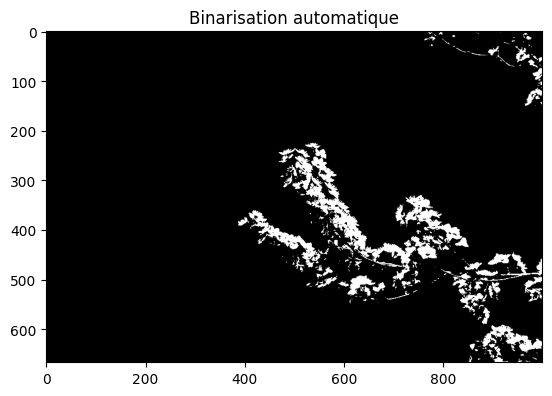

In [66]:
image_binarisée=binarisation_automatique(imgG)
plt.figure()
plt.imshow(image_binarisée, cmap="gray")
plt.title("Binarisation automatique")
plt.show()

In [67]:
def histogrammeCumule(hist):
        histCum = np.zeros(256)
        histCum[0] = hist[0]
        for i in range(1, 256):
            histCum[i] = histCum[i-1] + hist[i]
        return histCum

In [68]:
histCum = histogrammeCumule(hist)

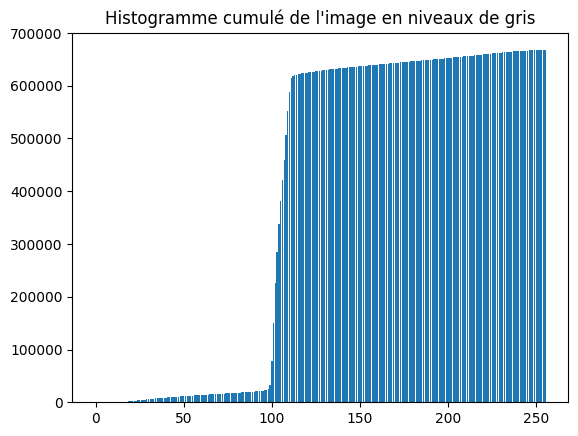

In [69]:
plt.figure()
plt.bar(range(256), histCum)
plt.title('Histogramme cumulé de l\'image en niveaux de gris')
plt.show()

In [70]:
def egalisationHistogramme(img):
        hist = histogramme(img)
        histCum = histogrammeCumule(hist)
        histCum = (histCum - histCum.min()) * 255 / (histCum.max() - histCum.min())
        imgE = histCum[img]
        return imgE

In [71]:
egalisee = egalisationHistogramme(imgG)

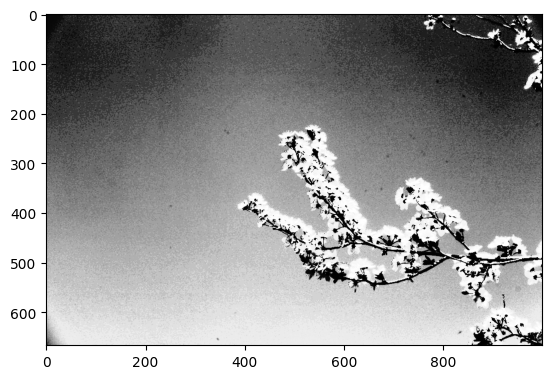

In [56]:
plt.figure()
plt.imshow(egalisee, cmap="gray")
plt.show()

In [72]:
def affichage_fonction_repartition(histCum):
    plt.figure()
    plt.plot(range(256), histCum)
    plt.title('Fonction de répartition')
    plt.show()

In [73]:
def affichage_histogramme_egalise(img):
    hist = histogramme(img)
    histCum = histogrammeCumule(hist)
    histCum = (histCum - histCum.min()) * 255 / (histCum.max() - histCum.min())
    affichage_fonction_repartition(histCum)
    plt.figure()
    

# Manipulation de l'image de la rue


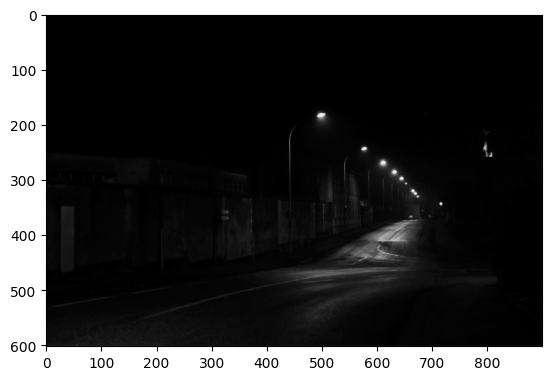

In [75]:
#Ouvrir une image
img2 = cv.imread("imagesTP/rue.jpg")
img2 = cv.cvtColor(img,cv.COLOR_BGR2RGB)

#Afficher une image
plt.figure()
plt.imshow(img)

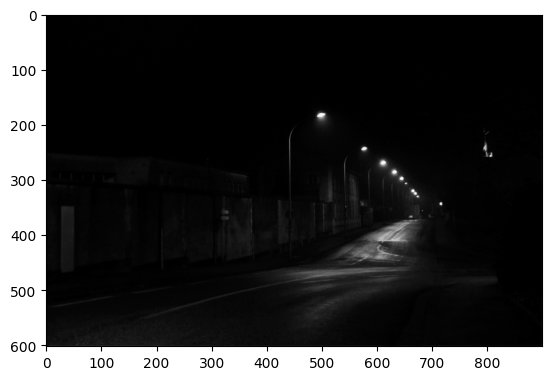

In [77]:
# Transformation en niveau de gris
imgG2 = cv.cvtColor(img2,cv.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(imgG, cmap="gray")

plt.show()

In [78]:
hist2=histogramme(imgG2)
image_binarisée2=binarisation_automatique(imgG2)

m0 1.0000000000000004
m1 6.899959394610555
m2 271.1278663713547
m3 25775.378132152087
c0 466.80152548809235
c1 -106.94691804068177
seuil 53.47345902034088


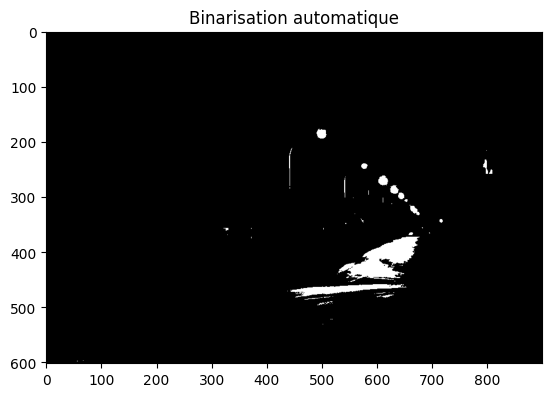

In [79]:
plt.figure()
plt.imshow(image_binarisée2, cmap="gray")
plt.title("Binarisation automatique")
plt.show()

In [80]:
histCum2 = histogrammeCumule(hist2)


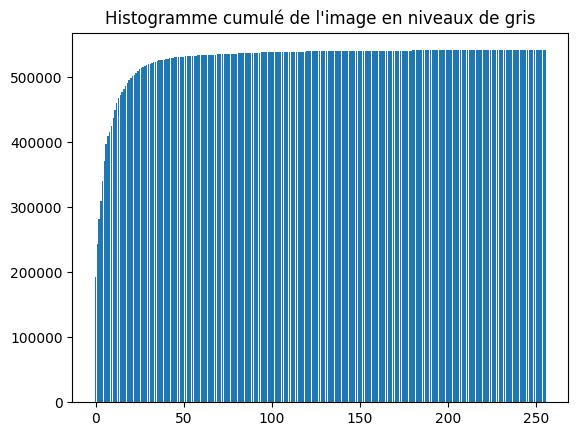

In [81]:
plt.figure()
plt.bar(range(256), histCum2)
plt.title('Histogramme cumulé de l\'image en niveaux de gris')
plt.show()

In [82]:
egalisee2 = egalisationHistogramme(imgG2)

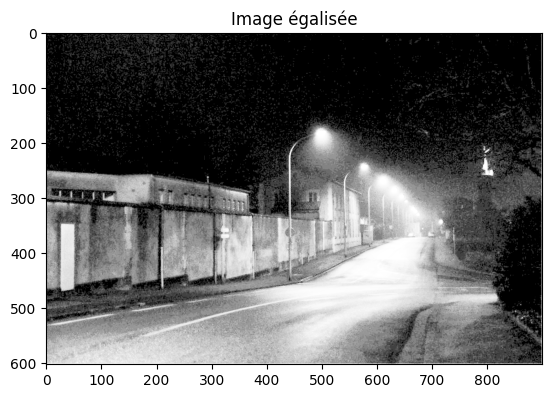

In [83]:
plt.figure()
plt.imshow(egalisee2, cmap="gray")
plt.title("Image égalisée")
plt.show()

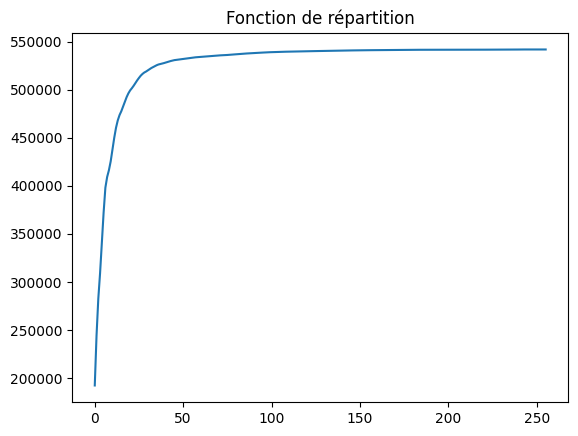

In [84]:
affichage_repartion_rue=affichage_fonction_repartition(histCum2)

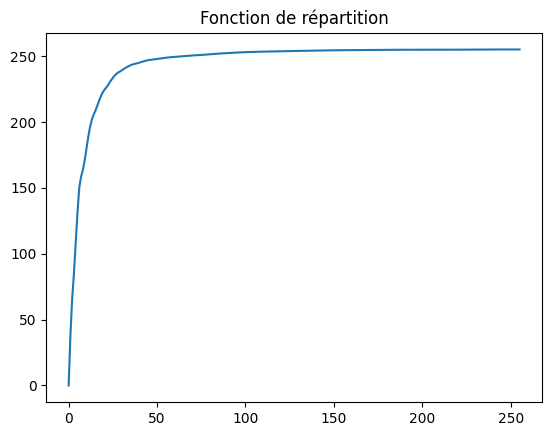

In [86]:
affichage_histogramme_egalise_rue=affichage_histogramme_egalise(imgG2)


In [ ]:
def detection_contour(img):
    
    

# 2/ Transformée de Fourier 

 A partir de sa définition proposer une méthodologie réalisant le calcul de la 
transformée de Fourier 2D sachant que l’on possède la fonction fft permettant 
de calculer une TFD 1D. 